In [181]:
# setup.sh - makes directories

In [ ]:
# download.sh - downloads images

In [1]:
# gen.py - generates narrative
import math, random
# a sequence of plot events in a coming of age story
# birth => misc. rite of passages => struggle ( + resolution ) => death
rite_of_passages = {
    'infancy': {  # life, firsts, parents
        'options':[ # events in chronological order
            'parents',
            'steps'   
        ],
        'filler': ['playing', 'parents'] # events which can recur
    },
    'childhood': {  # kindergarten, learning, friends, parents
        'options':[ 
            'friend'
        ],
        'filler': ['kindergarten', 'friend']
    },
    'adolescence': { # highschool, parties, friends, romance
        'options':[ 
            'sixteenth',
            'best_friend',
            'prom',
            'first_drink'
        ],
        'filler': ['party', 'friends', 'school']
    },
    'early_adult': { # independence, travel, graduation, early career
        'options':[ 
            'moving_out',
            'twenty_first',
            'graduation'
        ],
        'filler': ['party', 'work', 'university', 'friends']
    },
    'mid_adult': { # settling down, career, marriage, children
        'options':[ 
            'marriage',
            'children'
        ],
        'filler': ['work', 'friends']
    },
    'late_adult': { # retirement, grandchildren
        'options':[ 
            'retirement'
        ],
        'filler': ['grandchildren']
    }
}

struggles = [
    {
        'life_stage': 'late_adult',
        'name': 'sickness',
        'precondition': None
    },
    {
        'life_stage': 'late_adult',
        'name': 'spouse_death',
        'precondition': 'marriage'
    }
]

class Plot: 
    def __init__(self, length):
        self.length = length if length > 20 else 20 # 3 events from each life stage minimum
        self.events = []
        self.struggle = random.choice(struggles)
        self.init_events()
            
    def init_events(self):
        class Event:
            def __init__(self, name=None, index=None, life_stage=None, image=None, text=None):
                self.name = name
                self.index = index
                self.life_stage = life_stage
                self.image = image
                self.text = text            
        length_of_struggle_stage = 0
        life_stages = list(rite_of_passages)
        life_stage_map = []
        # partition stages of life
        for i in range(self.length):
            index = i
            event = ''
            if index == 0:
                event = 'birth'
            elif index == self.length - 1:
                event = 'death'
            else:
                index = index - 1
                mapped_index = math.floor((index / (self.length - 2)) * len(life_stages))
                life_stage = life_stages[mapped_index]
                event = life_stage
            
            if event == self.struggle['life_stage']:
                length_of_struggle_stage = length_of_struggle_stage + 1
                
            self.events.append(event)
            
        life_stage_map = self.events.copy()
        # insert struggle
        min_start_offset = 1 if self.struggle['precondition'] is not None else 0
        start_of_struggle_stage = self.events.index(self.struggle['life_stage'])
        struggle_index = start_of_struggle_stage + length_of_struggle_stage - 1
        self.events[struggle_index] = self.struggle['name']
        
        # insert precondition
        if self.struggle['precondition'] is not None:
            self.events[start_of_struggle_stage] = self.struggle['precondition']

        # replace remaining life stages with rites of passage, making sure that the preconditions are always appended first
        rites = rite_of_passages
        for i in range(len(self.events)):
            value = self.events[i]
            if (value in life_stages):
                if len(rites[value]['options']) > 0:
                    event = rites[value]['options'].pop(0)
                    if (event in self.events):
                        event = rites[value]['options'].pop(0)
                else:
                    event = random.choice(rites[value]['filler'])
                self.events[i] = event
        
        # create event objects from events
        for i in range(len(self.events)):
            name = self.events[i]
            life_stage = life_stage_map[i]
            image = './temp/{}/{}'.format(life_stage_map[i], self.events[i]) if life_stage != 'death' else None
            event = Event(
                name= name,
                index=i,
                life_stage = life_stage,
                image = image
#                 text
            )
            self.events[i] = event
            
k = Plot(20)
for z in k.events:
#     print(z.name)
    print('Index: {}\nLife Stage: {}\nName: {}\nImage: {}\nText: {}\n==========='.format(z.index, z.life_stage, z.name, z.image, z.text))

# draw 
# create a directory of pages

Index: 0
Life Stage: birth
Name: birth
Image: ./temp/birth/birth
Text: None
Index: 1
Life Stage: infancy
Name: parents
Image: ./temp/infancy/parents
Text: None
Index: 2
Life Stage: infancy
Name: steps
Image: ./temp/infancy/steps
Text: None
Index: 3
Life Stage: infancy
Name: parents
Image: ./temp/infancy/parents
Text: None
Index: 4
Life Stage: childhood
Name: friend
Image: ./temp/childhood/friend
Text: None
Index: 5
Life Stage: childhood
Name: kindergarten
Image: ./temp/childhood/kindergarten
Text: None
Index: 6
Life Stage: childhood
Name: friend
Image: ./temp/childhood/friend
Text: None
Index: 7
Life Stage: adolescence
Name: sixteenth
Image: ./temp/adolescence/sixteenth
Text: None
Index: 8
Life Stage: adolescence
Name: best_friend
Image: ./temp/adolescence/best_friend
Text: None
Index: 9
Life Stage: adolescence
Name: prom
Image: ./temp/adolescence/prom
Text: None
Index: 10
Life Stage: early_adult
Name: moving_out
Image: ./temp/early_adult/moving_out
Text: None
Index: 11
Life Stage: ear

In [2]:
event_sequences = {
            'infancy': [ 'parents', 'playing'], # life, firsts, parents
            'childhood': [ 'kindergarten' ],  # kindergarten, learning, friends, parents
            'adolescence': [ 'school', 'prom', 'first_drink', 'party' ],  # highschool, parties, friends, romance
            'early_adult': [ 'moving_out', 'university', 'twenty_first', 'graduation', 'work' ], # independence, travel, graduation, early career
            'mid_adult': [ 'marriage', 'children' ], # settling down, career, marriage, children
            'late_adult': [ 'retirement', 'grandchildren', 'spouse_death', 'sickness' ] # retirement, grandchildren
        }

import os
import random
import copy
def get_image_map():
    image_map = {}
    base_path = 'temp/downloads/'
    for life_stage in os.listdir(base_path):
        image_map[life_stage] = { 'filler': [] }

        for item in os.listdir(base_path+life_stage):
            if os.path.isdir('{}{}/{}'.format(base_path, life_stage, item)): # if there is a folder of images
                image_map[life_stage][item] = [] # create an array of paths
                for folder_image in os.listdir('{}{}/{}'.format(base_path, life_stage, item)):
                    image_map[life_stage][item].append('{}{}/{}/{}'.format(base_path, life_stage, item, folder_image))

            else:
                image_map[life_stage]['filler'].append('{}{}/{}'.format(base_path, life_stage, item))
        
    return image_map

image_map = get_image_map()

def random_pop(arr):
    return arr.pop(random.randrange(len(arr)))

class Story:
    def __init__(self, num_pages):
        self.num_pages = num_pages
        self.events = self.init_events()
    def init_events(self):
        class Event:
            def __init__(self, name=None, index=None, life_stage=None, images=[], moment=None):
                self.name = name
                self.index = index
                self.life_stage = life_stage
                self.images = images
                self.moment = moment
        
        event_map = copy.deepcopy(event_sequences)
        events = []
        life_stages = list(rite_of_passages)
        life_map = copy.deepcopy(image_map)
        for i in range(self.num_pages):
            life_stage = ''
            images = []
            moment = None
            if i == 0:
                life_stage = 'birth'
                birth_image = random.choice(life_map['birth']['filler'])
                images.append(birth_image)
            elif i == self.num_pages - 1:
                life_stage = 'death'
            else:
                i = i - 1 
                mapped_index = math.floor((i / (self.num_pages - 2)) * len(life_stages))
                life_stage = life_stages[mapped_index]
                if len(event_map[life_stage]) > 0: # if there are events left to be added
                    moment = event_map[life_stage].pop(0) # pick next life event and remove from array
                    while len(images) < random.randint(4, 5): # pick between 3 to 5 images
                        if len(life_map[life_stage][moment]) > 0: 
                            image = random_pop(life_map[life_stage][moment])
                        elif len(life_map[life_stage]['filler']) > 0: # if out of moment images, use filler
                            image = random_pop(life_map[life_stage]['filler']) 
                        else: # if out of filler images, break
                            break
                        images.append(image)
                    if len(life_map[life_stage][moment]) > 0:
                        life_map[life_stage]['filler'] = life_map[life_stage]['filler'] + life_map[life_stage][moment] # if there are pictures left in the life event, chuck them in the filler array
                else: # if generic page ( no event )
                    while len(images) < random.randint(2, 4): # pick between 2 to 3 images
                        if len(life_map[life_stage]['filler']) > 0: # pick first from filler images
                            image = random_pop(life_map[life_stage]['filler'])
                        else: # if out of images to pick from, break
                            print(life_stage, 'out of filler')
                            break
                        images.append(image)           

                i = i + 1

            event = Event(index=i, life_stage=life_stage, images=images, moment=moment)
            events.append(event)
        return events

z = Story(28)
for event in z.events:
    print('#{} || {} || {} || {}'.format(event.index, event.life_stage, event.moment, event.images[0] if len(event.images) > 0 else None))
#     print('#{:02d }|| {} || {} || {}\n\n==========================\n'.format(event.index, event.life_stage, event.moment, event.images))

#0 || birth || None || temp/downloads/birth/newborn-baby-feet-basket-161709.jpeg
#1 || infancy || parents || temp/downloads/infancy/parents/pexels-photo-102170.jpeg
#2 || infancy || playing || temp/downloads/infancy/playing/pexels-photo-315265.jpeg
#3 || infancy || None || temp/downloads/infancy/pexels-photo-437747.jpeg
#4 || infancy || None || temp/downloads/infancy/photo-1505976442149-53a82393903b?auto=format&fit=crop&w=2550&q=60&ixid=dW5zcGxhc2guY29tOzs7Ozs%3D.jpeg
#5 || infancy || None || temp/downloads/infancy/playing/pexels-photo-459905.jpeg
#6 || childhood || kindergarten || temp/downloads/childhood/kindergarten/pexels-photo-207697.jpeg
#7 || childhood || None || temp/downloads/childhood/photo-1502031560955-34b542d0a80b?auto=format&fit=crop&w=2501&q=60&ixid=dW5zcGxhc2guY29tOzs7Ozs%3D.jpeg
#8 || childhood || None || temp/downloads/childhood/pexels-photo-129426.jpeg
#9 || childhood || None || temp/downloads/childhood/pexels-photo-551576.jpeg
#10 || adolescence || school || temp/do

In [3]:
random.randrange(10, 11)

10

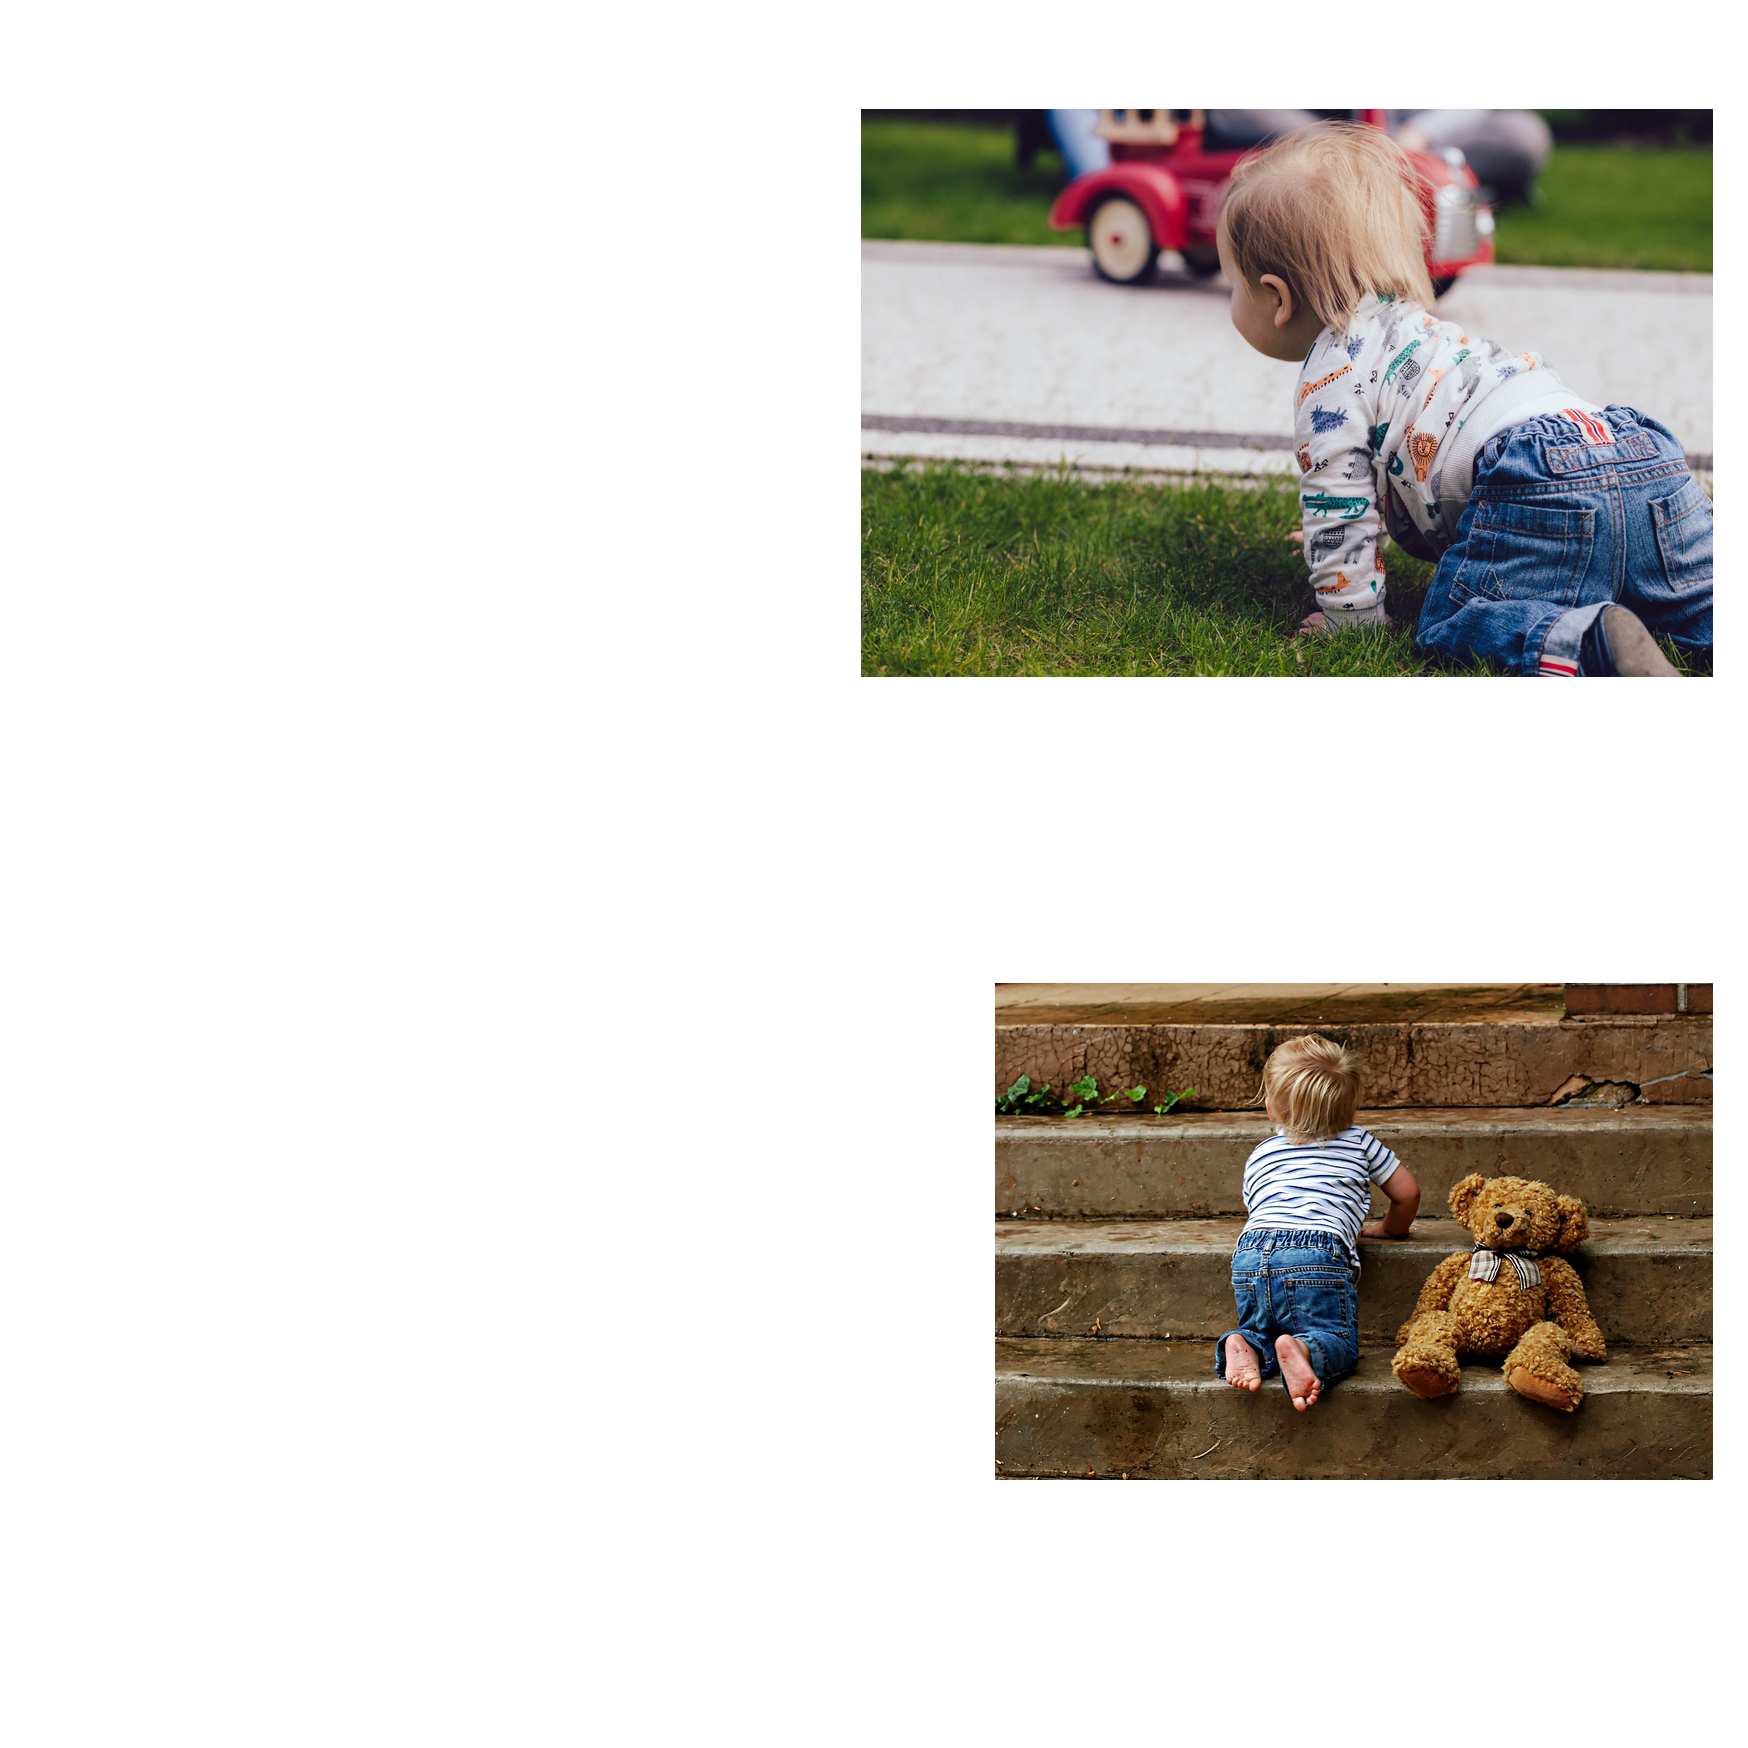

In [56]:
# debug image drawing
from PIL import Image, ImageDraw
from IPython.display import Image as PyImage
import copy
def randrange(r):
    return random.randrange(int(r[0]), int(r[1]))

def is_colliding(el1, el2):
    if type(el2) is list:
        if len(el2) > 0:
            for el in el2:                              
                collision = (el1.x < (el.x + el.w) and el1.x + el1.w > el.x and el1.y < el.y + el.h and el1.y + el1.h > el.y) 
                if (collision):
                    return True
        return False
    else:
        return (el1.x < el.x + el.max_w and el1.x + el1.max_w > el.x and el1.y < el.y + el.max_h and el1.y + el1.max_h > el.y) 

def is_off_page(el, page_width, page_height):
    return (el.x < 0 or (el.x + el.max_w) > page_width) or (el.y < 0 or (el.y + el.max_h) > page_height) 

class Page:
    def __init__(self, w=100, h=100, page_number=0, position='L', elements=[], bg_color="white"):
        self.w = w
        self.h = h
        self.page_number = page_number
        self.position = position
        self.elements = elements
        self.bg_color = bg_color
        self.init_elements(elements)
        self.shake_elements()
    def init_elements(self, elements):
        new_elements = []
        if len(elements) > 0:
            for i in elements:
                rectmode = None
                if self.page_number == 0: # if birth page, render image in middle
                    rectmode = 'CENTER'
                    x = self.w/2
                    y = self.h/2
                    max_dimension = self.w/2
                else: # place all elements uniformly on page
                    # define a vertical line
                    # start on either side of it
                    origin_x = self.w/2 + randrange([-self.w/6, self.w/6])
                    max_dimension = self.w/(len(elements) + 2)
                    x = random.choice([origin_x - max_dimension, origin_x])
                    y = len(new_elements)*(self.h/len(elements)) + max_dimension/4
                new_element = Page_Element(x=x, y=y, max_dimension=max_dimension, url=i, rectmode=rectmode)
                new_elements.append(new_element)
        self.elements = new_elements
    def shake_elements(self):
        if type(self.page_number) is int and self.page_number > 0:
            for i in range(len(self.elements)):
                el = self.elements[i]
                elements_to_check = copy.deepcopy(self.elements) # check only against other elements
                elements_to_check.pop(i)
                spacing = int(self.w/50)
                def add_spacing(a): # add a margin around existing elements
                    spacing = int(self.w/50)
                    a.x = a.x - spacing
                    a.y = a.y - spacing
                    a.w = a.w + spacing*2
                    a.h = a.h + spacing*2
                    return a

                list(map(add_spacing, elements_to_check))       
                while(not is_colliding(el, elements_to_check)):
                    el.scale(el.max_dimension + 0.4)         
                    if (el.x < spacing or ((el.w + el.x) > (self.w - spacing)) or el.y < spacing or ((el.y + el.h) > (self.h + spacing))):
                        if (el.x < spacing): # if exceeding left bound
                            el.x = spacing
                        if (el.w + el.x) > (self.w - spacing): #
                            el.x = self.w - spacing - el.w
                        if el.y < spacing:
                            el.y = spacing
                        if (el.y + el.h) > (self.h + spacing):
                            el.y = self.h - spacing - el.h
                        break

                if (el.x < spacing or ((el.w + el.x) > (self.w - spacing)) or el.y < spacing or ((el.y + el.h) > (self.h + spacing))):
                    if (el.x < spacing): # if exceeding left bound
                        el.x = spacing
                    if (el.w + el.x) > (self.w - spacing): #
                        el.x = self.w - spacing - el.w
                    if el.y < spacing:
                        el.y = spacing
                    if (el.y + el.h) > (self.h + spacing):
                        el.y = self.h - spacing - el.h
                
    def draw(self, output_directory='one.png'):
        doc = Image.new('RGB', (self.w, self.h), self.bg_color)
        if len(self.elements) > 0:
            for i in self.elements:
                i.draw(page=doc)
        doc.save(output_directory, 'PNG')
        
class Page_Element:
    def __init__(self, x, y, max_dimension, url, rectmode=None):
        self.x = x
        self.y = y
        self.max_dimension = max_dimension
        self.url = url
        self.rectmode = rectmode
        # load image and work out width and heights
        img_obj = Image.open(open(self.url, 'rb'))
        img_obj.thumbnail((self.max_dimension, self.max_dimension), Image.ANTIALIAS)
        img_w, img_h = img_obj.size
        self.w = img_w
        self.h = img_h
        if (img_w > img_h):
            self.orientation = 'LANDSCAPE'
        else:
            self.orientation = 'PORTRAIT'
    def scale(self, max_dimension):
        if (self.orientation == 'LANDSCAPE'):
            self.h = self.h * (max_dimension/self.w)
            self.w = max_dimension            
        else:
            self.w = self.w * (max_dimension/self.h)
            self.h = max_dimension
        self.max_dimension = max_dimension
    def draw(self, page):
        img_obj = Image.open(open(self.url, 'rb'))
        img_obj.thumbnail((self.max_dimension, self.max_dimension), Image.ANTIALIAS)
        x = self.x
        y = self.y
        if self.rectmode == 'CENTER':
            x = self.x - self.w/2
            y = self.y - self.h/2
        page.paste(img_obj, (int(x), int(y)))

# Create book, page by page =================================  
book = []
page_w = 1748
page_h = 1748
            
# Create cover
cover = Page(w=page_w, h=page_h, page_number='C', position='R', bg_color="black")
book.append(cover)
# Create inside cover
inside_cover = Page(w=page_w, h=page_h, page_number='IC', position='L')
book.append(inside_cover)       
# Collage pages
for e in z.events:
    position = 'R' if e.index % 2 == 0 else 'L'
    elements = e.images.copy()           
    collage_page = Page(w=page_w, h=page_h, page_number=e.index, position=position, elements=elements)
    book.append(collage_page)
# Create inside back cover
back_inside_cover = Page(w=page_w, h=page_h, page_number='BIC', position='R')
book.append(back_inside_cover)  
# Create back cover
back_cover = Page(w=page_w, h=page_h, page_number='BC', position='L', bg_color="black")
book.append(back_cover)

# book[5].draw()
# for i in book[3].elements:
#     print(i.url)


PyImage(filename='one.png', width=500)

In [64]:
# draw pages into a new directory
from PIL import Image, ImageDraw
from IPython.display import Image as PyImage
import time
import datetime
# create directory ====
timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d-%H%M%S%f')
image_dir = 'temp/outputs/images/{}/'.format(timestamp)
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# create pages for each event in the story object ====
for i in range(len(book)):
    page = book[i]
    page.draw(output_directory='{}{:02d}.png'.format(image_dir, i))

In [65]:
# export directory of images into a multi page pdf
# https://stackoverflow.com/questions/27327513/create-pdf-from-a-list-of-images
from fpdf import FPDF
from PIL import Image
def makePdf(pdfFileName, listPages, dir = '', pdfpath=''):
    cover = Image.open(dir + str(listPages[0]))
    width, height = cover.size

    pdf = FPDF(unit = "pt", format = [width, height])

    for page in listPages:
        pdf.add_page()
        pdf.image(dir + str(page), 0, 0)
    print(pdfpath + ".pdf")
    pdf.output(pdfpath + ".pdf", "F")

image_paths = os.listdir(image_dir)
pdf_output_path = 'temp/outputs/pdfs/{}'.format(timestamp)
makePdf(timestamp, image_paths, dir=image_dir, pdfpath=pdf_output_path)


temp/outputs/pdfs/2017-10-31-230239223591.pdf
